In [8]:
# importing dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
, MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans



### Part 1: Prepare the Data

In [2]:
# importing the data
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# removing the "myopic" column
del df["MYOPIC"]
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [19]:
# standardising my dataset
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

### Part 2: Apply Dimensionality Reduction

In [26]:
# performing dimensionality reduction with PCA
pca = PCA(n_components=0.9)
scaled_pca = pca.fit_transform(X)
scaled_pca.shape

(618, 10)

In [27]:
# converting PCA to a DataFrame
pca_df = pd.DataFrame(scaled_pca)
pca_df


,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [28]:
# printing sum
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [32]:
# initialising t-SNE model
tsne = TSNE(learning_rate=200)

# reducing dimensions
tsne_features = tsne.fit_transform(scaled_pca)
tsne_features.shape

c:\Users\haldu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

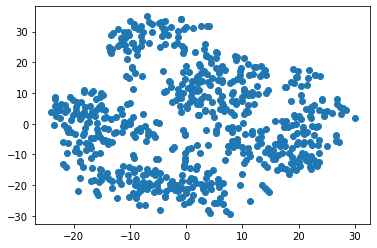

In [35]:
# plotting t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

In [39]:
# determining the number of clusters
inertia = []

# listing the k values
k = list(range(1,11))

# for loop for elbow plot
for i in k:
    km = KMeans(n_clusters=i, random_state=22)
    km.fit(scaled_pca)
    inertia.append(km.inertia_)

# dataframe to plot the elbow curve
elbow_data = {'k': k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df

c:\Users\haldu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.941519
3,4,5665.035996
4,5,5381.542988
5,6,5130.276717
6,7,4936.914039
7,8,4735.511636
8,9,4595.119547
9,10,4462.149272


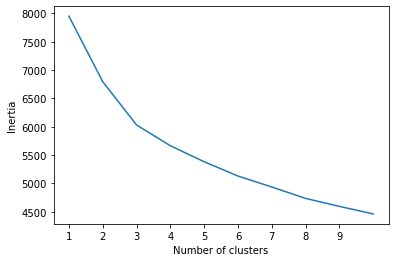

In [40]:
# plotting the elbow curve
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow curve above indicates that patients can be clustered and based on the scatter plot, 5 clutters can be identified.